Cho ma trận sau:



M=1 1 0
  2 2 0
  3 3 0
  4 4 0
  5 5 0
  6 6 1
  7 7 1
  8 8 1
  9 9 1
  10 10 1

  

In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [122]:
M = np.array([[1, 1, 0] ,[2, 2, 0],[ 3, 3, 0],[ 4, 4, 0],[ 5, 5, 0],[ 6, 6, 1],[ 7, 7, 1], [8, 8, 1], [9, 9, 1], [10, 10, 1]])
M

array([[ 1,  1,  0],
       [ 2,  2,  0],
       [ 3,  3,  0],
       [ 4,  4,  0],
       [ 5,  5,  0],
       [ 6,  6,  1],
       [ 7,  7,  1],
       [ 8,  8,  1],
       [ 9,  9,  1],
       [10, 10,  1]])

1. Viết câu lệnh để tách cột 1 và 2 lưu vào ma trận X, cột 3 lưu vào y.

In [123]:
X = M[:,:2]
y = M[:,2]

2. Viết hàm để tách X và y thành X_test, X_train, y_test, y_train theo một tỉ lệ cho trước. In dữ liệu để kiểm tra

In [124]:
def split_data(X, y, test_size=0.2):
  np.random.seed(42)
  indices = np.random.permutation(len(X))
  n_test=int(len(X)*test_size)
  X_train=X[indices[n_test:]]
  X_test=X[indices[:n_test]]
  y_train=y[indices[n_test:]]
  y_test=y[indices[:n_test]]
  return X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = split_data(X, y, test_size=0.2)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train: [[ 6  6]
 [ 1  1]
 [ 8  8]
 [ 3  3]
 [10 10]
 [ 5  5]
 [ 4  4]
 [ 7  7]]
X_test: [[9 9]
 [2 2]]
y_train: [1 0 1 0 1 0 0 1]
y_test: [1 0]


3. Sử dụng thư viện có sẵn để tách bộ dữ liệu theo yêu cầu câu 2

In [125]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=0)
print("X_train (sklearn):", X_train1)
print("X_test (sklearn):", X_test1)
print("y_train (sklearn):", y_train1)
print("y_test (sklearn):", y_test1)

X_train (sklearn): [[ 5  5]
 [10 10]
 [ 2  2]
 [ 7  7]
 [ 8  8]
 [ 4  4]
 [ 1  1]
 [ 6  6]]
X_test (sklearn): [[3 3]
 [9 9]]
y_train (sklearn): [0 1 0 1 1 0 0 1]
y_test (sklearn): [0 1]


4. Viết câu lệnh để đọc file Data_classification.csv cho trước lưu vào Dataset

In [126]:
Dataset = pd.read_csv('data_classification.csv',header=None)
Dataset.head()

,0,1,2
0,4.855064,9.639962,1
1,8.625440,0.058927,0
2,3.828192,0.723199,0
3,7.150955,3.899420,1
4,6.477900,8.198181,1


5. Tách tập dữ liệu Dataset ở câu 4 thành X và y

In [127]:
#.values:chuyển từ dataframe sang mảng numpy để làm việc với thư viện sklearn
N, d = Dataset.shape
X = Dataset.iloc[:,:-1].values
y = Dataset.iloc[:,-1].values

6. Tách X,y thành X_train, X_test, y_train, y_test. Dùng hàm tự viết và dùng thư viện có sẵn. In kết quả kiểm tra

In [128]:
X_train1, X_test1, y_train1, y_test1 = split_data(X, y, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("Custom split:")
print("X_train shape:", X_train1.shape)
print("X_test shape:", X_test1.shape)
print("y_train shape:", y_train1.shape)
print("y_test shape:", y_test1.shape)

print("\nSklearn split:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Custom split:
X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)

Sklearn split:
X_train shape: (80, 2)
X_test shape: (20, 2)
y_train shape: (80,)
y_test shape: (20,)


7. Viết hàm tính Sigmod

In [129]:
def sigmod(x):
  return 1/(1+np.exp(-x.astype(np.float64)))

8. Viết hàm tính hàm mất mát theo mô hình hồi quy logistic

In [130]:
def predict(X,w):
  z = np.dot(X,w)
  return sigmod(z)
def loss_function(X, y, w):
    epsilon = 1e-10
    prediction = predict(X, w)
    prediction = np.clip(prediction, epsilon, 1 - epsilon)
    loss_class1 = -y * np.log(prediction)
    loss_class2 = -(1 - y) * np.log(1 - prediction)
    loss = loss_class1 + loss_class2
    return np.sum(loss) / len(y)

9. Viết hàm huấn luyện mô mình.

In [131]:
def update(X,y,w,learning_rate):
  n=len(y)
  prediction = predict(X,w)
  temp = np.dot(X.T,(prediction-y))/n
  w = w-temp*learning_rate
  return w
def train(X, y, w, learning_rate, iter):
  history_loss = []
  for i in range(iter):
    loss = loss_function(X, y, w)
    history_loss.append(loss)
    w = update(X, y, w, learning_rate)
  return w, history_loss

X = np.hstack((np.ones((N, 1)), X))
w = np.array([0.1]*X.shape[1]).reshape(-1, 1)
numOfIteration = 100000
learning_rate = 0.01
w,loss = train(X,y,w,learning_rate,numOfIteration)


10. In tham số mô hình để kiểm tra.

In [132]:
# print("w:",w)
print("loss:",loss)


loss: [80.43621009857299, 64.8759923161806, 52.80069455063527, 43.850670249168964, 37.33337886625443, 32.54371787064708, 28.93781874909414, 26.145014262262425, 23.9225704950972, 22.111281778540693, 20.60467528359069, 19.32969176820434, 18.23484792390262, 17.282935319595534, 16.446432225638258, 15.704552724398386, 15.041302581977401, 14.444168060393462, 13.903211885921307, 13.410437062541291, 12.959330670969562, 12.544531042907455, 12.161581081429588, 11.806742768270674, 11.476855820759123, 11.16922867204906, 10.881553436436054, 10.611838895069376, 10.358357177412067, 10.11960096337116, 9.894248847661618, 9.681137095406413, 9.479236445518007, 9.287632933008027, 9.105511935260914, 8.932144822878438, 8.766877728698683, 8.609122050204382, 8.458346378795794, 8.314069610139597, 8.175855037281217, 8.043305265572357, 7.916057818061936, 7.793781323585844, 7.6761721986988185, 7.562951749832033, 7.453863634409409, 7.348671629712548, 7.247157666513204, 7.149120091256789, 7.054372126165061, 6.96274

11. Vẽ biểu đồ biểu thị sự giảm của hàm mất mát

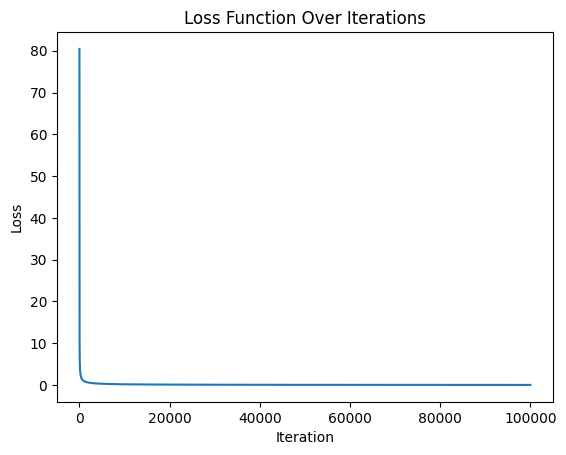

In [133]:
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Function Over Iterations')
plt.show()

12. Viết hàm dự đoán.

In [134]:
def decisionBoundary(p):
  if p>=0.5:return 1
  else: return 0

13. Cho biết tỉ lệ dự đoán từ mô hình do bạn xây dựng nên

In [135]:
w = w[:2, 0].reshape(X_test.shape[1], 1)
y_pred = predict(X_test,w)
y_pred_binary = [decisionBoundary(p) for p in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.60


14. Sử dụng mô hình có từ các thư viện để dự đoán so sánh kết quả.

```
# Định dạng của đoạn này là mã
```



In [136]:
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression()
model_sk.fit(X_train, y_train)
y_pred1 = model_sk.predict(X_test)
accuracy1= np.mean(y_pred1 == y_test)
print(f"Sklearn Logistic Regression Accuracy: {accuracy1:.2f}")

Sklearn Logistic Regression Accuracy: 0.90


15. Sử dụng mô hình trên cho bài toán dự đoán nhị phân bất kỳ như dự đoán bệnh ung thư, bệnh trầm cảm, khách hàng gởi tiền vào ngân hàng. SV tự tìm dữ liệu trên mạng

In [138]:
import seaborn as sns

# Load the dataset
titanic = sns.load_dataset('titanic')

# Feature selection and preprocessing
X = titanic[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
X = pd.get_dummies(X, columns=['sex', 'pclass'], drop_first=True)
X['age'] = X['age'].fillna(X['age'].median())
y = titanic['survived'].values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize weights
w = np.zeros((X_train.shape[1] + 1, 1))  # Adjusted to include bias term

# Add bias term (intercept) to feature matrix
X_train = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
X_test = np.hstack((np.ones((X_test.shape[0], 1)), X_test))

# Define training parameters
numOfIteration = 100000
learning_rate = 0.01

# Train custom model (using your logistic regression function)
w, loss = train(X_train, y_train.reshape(-1, 1), w, learning_rate, numOfIteration)

# Make predictions with custom model
y_pred = predict(X_test, w)
y_pred_binary = [decisionBoundary(p) for p in y_pred]

# Evaluate custom model accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy on Titanic dataset: {accuracy:.2f}")

# Train and evaluate with Sklearn's Logistic Regression
model_sk = LogisticRegression(max_iter=200)  # Increased max_iter for convergence
model_sk.fit(X_train, y_train)
y_pred1 = model_sk.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f"Sklearn Logistic Regression Accuracy: {accuracy1:.2f}")

Accuracy on Titanic dataset: 0.81
Sklearn Logistic Regression Accuracy: 0.80
